In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

from model import Schelling
from mesa.batchrunner import BatchRunner
import numpy as np
import pandas as pd

In [3]:
sims = 5
grid_size_range = np.linspace(50, 150, num=3, dtype=int)
alpha_range = np.linspace(0.90, 1, num=8)
print(f'For grid sizes={grid_size_range}\nFor aplhas={alpha_range}')

fixed_params = {"density": 0.97,
                "pop_weights": (0.6, 0.4),
                "fixed_areas_pc": 0.0, 
                "cluster_threshold": 4,  
                "homophily": 5, 
                "stopping_threshold": 5,
                "stats": True,
                "server": False}
variable_params = {
    "size": grid_size_range,
    "alpha": alpha_range
}

batch_run = BatchRunner(
    Schelling,
    variable_params,
    fixed_params,
    iterations=sims,
    max_steps=100,
    model_reporters={"percolation_system": lambda m: m.percolation_system, 
                     "stopping_step": lambda m: m.schedule.steps,
                     "segregation_coefficient": lambda m: m.segregation_coefficient,
                     "half_time": lambda m: m.half_time,
                     }
)

batch_run.run_all()
df = batch_run.get_model_vars_dataframe()
df.to_csv('critical_alpha_batch_run.csv')

C:\Users\mirja\AppData\Local\Temp\ipykernel_18020\190996822.py:19: DeprecationWarning: BatchRunner class has been replaced by batch_run function. Please see documentation.
  batch_run = BatchRunner(


For grid sizes=[ 50 100 150]
For aplhas=[0.9        0.91428571 0.92857143 0.94285714 0.95714286 0.97142857
 0.98571429 1.        ]


120it [8:47:23, 263.69s/it]


[0.9        0.91428571 0.92857143 0.94285714 0.95714286 0.97142857
 0.98571429 1.        ] [ 50 100 150]
[[1.         1.         1.         1.01668684 1.31830544 1.36451294
  2.10089909 3.21054592]
 [1.         1.         1.         1.23678061 1.22370888 1.41243199
  1.89031137 2.84847151]
 [1.         1.         1.05929489 1.23366054 1.33326807 1.70176453
  1.98472087 3.76035897]]


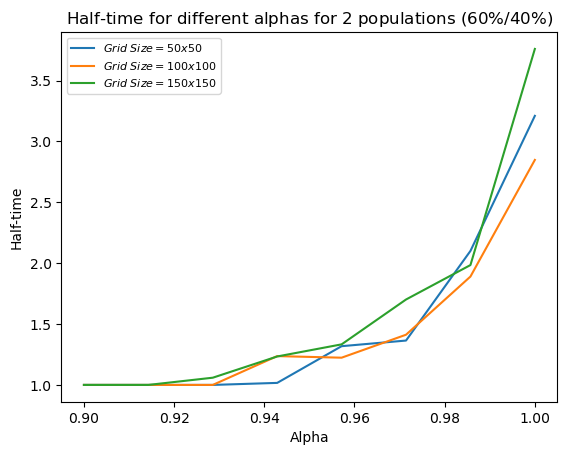

In [14]:
# Open the csv file and read it into a DataFrame
df = pd.read_csv("critical_alpha_batch_run.csv")

# Group the DataFrame by alpha and size and calculate the sum of half_time
grouped_df = df.groupby(['alpha', 'size'])['half_time'].sum().reset_index()
grouped_df['half_time'] = grouped_df['half_time'] / sims

# Extract the unique values for alpha and size
alpha_values = grouped_df['alpha'].unique()
size_values = grouped_df['size'].unique()

# Create an empty array to store the half-times
half_time_counts = np.zeros((len(size_values), len(alpha_values)))
for i, n in enumerate(size_values):
    for j, h in enumerate(alpha_values):
        mask = (grouped_df['alpha'] == h) & (grouped_df['size'] == n)
        half_time_counts[i, j] = grouped_df.loc[mask, 'half_time']

# Plot the half-time results
for i, size in enumerate(size_values):
    plt.title(r'Half-time for different alphas for 2 populations $(60\%/40\%)$')
    plt.plot(alpha_values, half_time_counts[i], label=r'$Grid\ Size = %i x %i$' % (size, size))

plt.xlabel('Alpha')
plt.ylabel('Half-time')
plt.legend(prop={'size': 8})
plt.show()

In [43]:
def derivative(x,y):
    derivative = np.zeros((len(x)))
    for i in range(len(x)-1):
        derivative[i] = (y[i] - y[i+1]) / (x[i] - x[i+1])
    return derivative

In [46]:
first_deriv = np.zeros((3,8))

first_deriv[0] = derivative(alpha_values, half_time_counts[0])
first_deriv[1] = derivative(alpha_values, half_time_counts[1])
first_deriv[2] = derivative(alpha_values, half_time_counts[2])

[-0.         -0.          1.16807905 21.11330186  3.23452457 51.54703106
 77.67527816  0.        ]


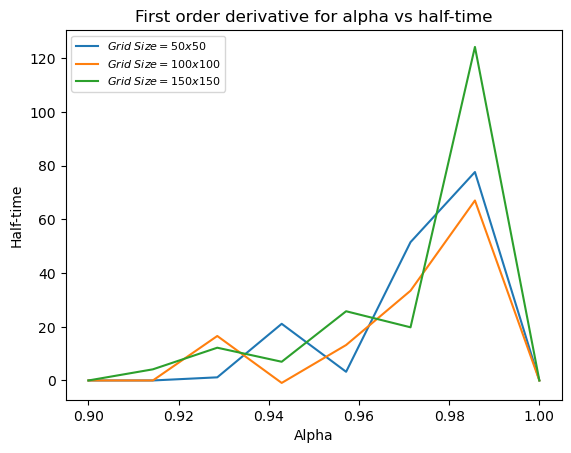

In [47]:
# Plot the first order derivative
for i, size in enumerate(size_values):
    plt.title('First order derivative for alpha vs half-time')
    plt.plot(alpha_values, first_deriv[i], label=r'$Grid\ Size = %i x %i$' % (size, size))

plt.xlabel('Alpha')
plt.ylabel('Half-time')
plt.legend(prop={'size': 8})
plt.show()

In [48]:
second_deriv = np.zeros((3,8))

second_deriv[0] = derivative(alpha_values, first_deriv[0])
second_deriv[1] = derivative(alpha_values, first_deriv[1])
second_deriv[2] = derivative(alpha_values, first_deriv[2])

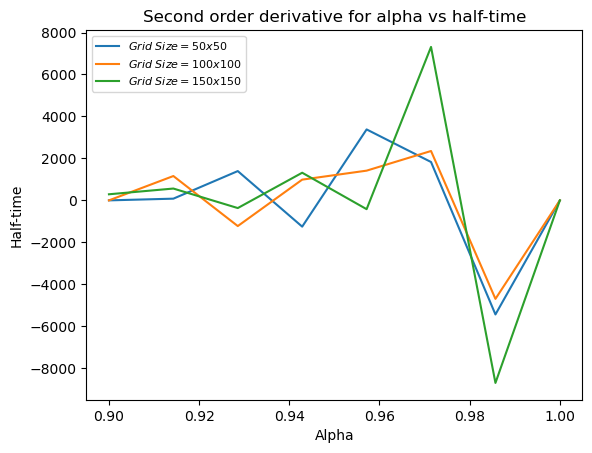

In [49]:
# Plot the second order derivative
for i, size in enumerate(size_values):
    plt.title('Second order derivative for alpha vs half-time')
    plt.plot(alpha_values, second_deriv[i], label=r'$Grid\ Size = %i x %i$' % (size, size))

plt.xlabel('Alpha')
plt.ylabel('Half-time')
plt.legend(prop={'size': 8})
plt.show()